# **📊 DESKRIPSI DATASET**

Wafer Dataset (Time Series Classification)

### **1️⃣ Sumber Dataset**

Dataset yang digunakan pada proyek ini adalah Wafer Dataset, yang diperoleh dari:

Time Series Classification Repository
https://www.timeseriesclassification.com

### **2️⃣ Penjelasan Dataset**

Data wafer berkaitan dengan proses fabrikasi mikroelektronika semikonduktor. Koleksi pengukuran kontrol proses inline yang direkam dari berbagai sensor selama pengolahan wafer silikon untuk fabrikasi semikonduktor membentuk basis data wafer; setiap dataset dalam basis data wafer berisi pengukuran yang direkam oleh satu sensor selama pengolahan satu wafer oleh satu alat.

### **3️⃣ Bentuk dan Jenis Data**

Dataset Wafer merupakan data time series univariat, dengan karakteristik sebagai berikut:

- Data berupa deretan nilai numerik
- Dicatat secara berurutan berdasarkan waktu

### **4️⃣ Struktur dan Kelas Dataset**

Dataset disediakan dalam dua bagian:

- Data latih (TRAIN)
- Data uji (TEST)

Dataset Wafer memiliki dua kelas:

| Kelas    | Arti                         |
| -------- | ---------------------------- |
| Normal   | Proses wafer berjalan normal |
| Abnormal | Terjadi gangguan atau cacat  |


### **6️⃣ Ketidakseimbangan Data (Imbalanced Dataset)**

Distribusi kelas pada dataset Wafer tidak seimbang, di mana:

Jumlah data Normal jauh lebih banyak

Data Abnormal hanya sekitar 10–12%


# **🧠 BUSINESS UNDERSTANDING**

### **1️⃣ Latar Belakang Permasalahan**

Selama proses produksi, mesin dilengkapi dengan sensor yang merekam kondisi proses secara terus-menerus. Namun, tidak semua gangguan dapat langsung dikenali secara manual dari sinyal sensor tersebut.


### **2️⃣ Permasalahan Bisnis**

Bagaimana cara mendeteksi wafer abnormal secara otomatis berdasarkan data sensor, sehingga potensi kegagalan proses dapat diketahui lebih awal?

### **3️⃣ Tujuan Proyek**

Tujuan dari proyek ini adalah:

- Membangun model klasifikasi berbasis data time series
- Mengklasifikasikan wafer ke dalam dua kelas:

  - Normal

  - Abnormal

- Membantu proses pengambilan keputusan dalam sistem kontrol kualitas

# **📊 DATA UNDERSTANDING**

### **1️⃣ Tujuan Tahap Data Understanding**

Tahap Data Understanding bertujuan untuk:

- Membaca dataset

  Dataset Wafer disediakan dalam format ARFF, sehingga perlu dibaca menggunakan library scipy.

- Memahami struktur dan isi dataset
  - Jumlah baris (jumlah wafer)
  - Jumlah kolom (fitur + label)
  - Tipe data setiap kolom
- Melihat distribusi kelas
 - Mengetahui apakah dataset seimbang atau tidak
  - Menentukan strategi evaluasi dan modeling.




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train Data Head:
       att1      att2      att3      att4      att5      att6      att7  \
0 -1.602294 -1.670823 -1.693666 -1.699377 -1.699377 -1.703660 -1.703660   
1  1.084591  1.084591  1.084591  1.065308  1.065308  1.065308  1.065308   
2  0.362689  0.362689  0.362689  0.393316  0.362689  0.362689  0.362689   
3 -1.094523 -1.094523 -1.094523 -1.096732 -1.094523 -1.096732 -1.094523   
4 -1.103761 -1.103761 -1.103761 -1.103761 -1.103761 -1.103761 -1.103761   

       att8      att9     att10  ...    att144    att145    att146    att147  \
0 -1.703660 -1.703660 -1.703660  ... -1.145432 -1.145432 -1.145432 -1.145432   
1  1.065308  1.065308  1.084591  ...  1.065308  1.065308  1.065308  1.065308   
2  0.362689  0.362689  0.362689  ...  0.393316  0.393316  0.362689  0.393316   
3 -1.094523 -1.094523 -1.096732  ... -1.096732 -1.096732 -1.096732 -1.096732   
4 -

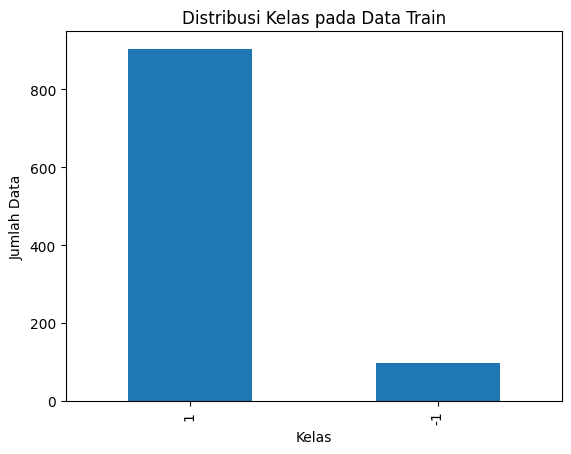

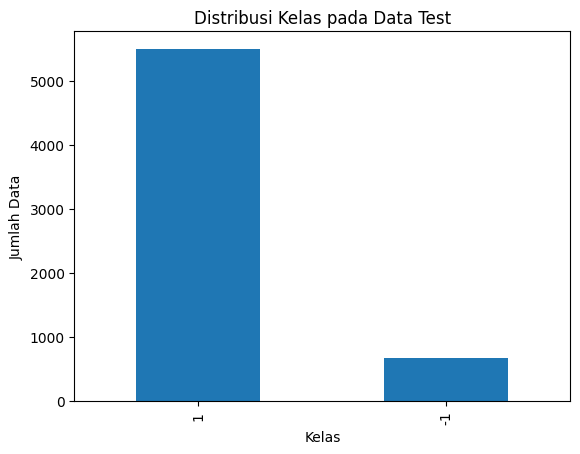

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
from google.colab import drive
drive.mount('/content/drive')

# Membaca data train dan test
train_data_path = '/content/drive/MyDrive/Semester 5/Proyek Sain Data/Wafer/Wafer_TRAIN.arff'
test_data_path = '/content/drive/MyDrive/Semester 5/Proyek Sain Data/Wafer/Wafer_TEST.arff'

# Mengubah ke DataFrame
data_train, meta_train = arff.loadarff(train_data_path)
df_train = pd.DataFrame(data_train)

data_test, meta_test = arff.loadarff(test_data_path)
df_test = pd.DataFrame(data_test)

# Menampilkan 5 data teratas
print("Train Data Head:")
print(df_train.head())
print("Test Data Head:")
print(df_test.head())

# Informasi struktur data
print("\nTrain Data Info:")
df_train.info()
print("\nTest Data Info:")
df_test.info()

# Decode label target
df_train['target'] = df_train['target'].str.decode('utf-8')
df_test['target'] = df_test['target'].str.decode('utf-8')

# Melihat nilai unik kelas
print("\nUnique classes in Train Data:")
print(df_train['target'].unique())
print("\nUnique classes in Test Data:")
print(df_test['target'].unique())

# Menghitung jumlah data tiap kelas
class_counts_train = df_train['target'].value_counts()
print("\nClass distribution in Train Data:")
print(class_counts_train)
class_counts_test = df_test['target'].value_counts()
print("\nClass distribution in Test Data:")
print(class_counts_test)

# Visualisasi distribusi kelas
plt.figure()
class_counts_train.plot(kind='bar')
plt.title('Distribusi Kelas pada Data Train')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Data')
plt.show()
class_counts_test.plot(kind='bar')
plt.title('Distribusi Kelas pada Data Test')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Data')
plt.show()


# **🧹 DATA PREPARATION**

(DATA PRE-PROCESSING)

### **Penjelasan Tahap Data Preparation**

Tahap Data Preparation bertujuan untuk menyiapkan data mentah agar dapat digunakan secara optimal oleh algoritma machine learning. Data yang telah dipahami pada tahap sebelumnya belum bisa langsung digunakan untuk pemodelan karena masih perlu disesuaikan dengan kebutuhan algoritma yang digunakan, yaitu Support Vector Machine (SVM).

Pada proyek ini, beberapa langkah preprocessing yang dilakukan adalah sebagai berikut:

1. Memisahkan fitur dan label
Kolom att1 hingga att152 digunakan sebagai fitur (X), sedangkan kolom target digunakan sebagai label (y). Pemisahan ini penting agar model dapat belajar hubungan antara fitur dan kelas.

2. Encoding label kelas
Label kelas masih berupa teks (Normal dan Abnormal). Karena algoritma machine learning hanya dapat memproses data numerik, label tersebut diubah menjadi bentuk numerik, yaitu:

    - Normal → 0

    - Abnormal → 1

3. Normalisasi data
Nilai pada data time series memiliki skala yang berbeda-beda. Algoritma SVM sangat sensitif terhadap skala fitur, sehingga dilakukan normalisasi menggunakan StandardScaler. Proses ini mengubah data agar memiliki rata-rata 0 dan standar deviasi 1.

4. Menjaga pemisahan data latih dan data uji
Normalisasi dilakukan dengan cara:

    - Menghitung parameter skala dari data latih
    - Menerapkan parameter tersebut ke data uji. Hal ini bertujuan untuk menghindari data leakage.

In [2]:
import pandas as pd
import numpy as np
from scipy.io import arff
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from google.colab import drive

# Muat ulang data untuk memastikan kolom ‘target’ berada dalam format byte-string.
data_train, meta_train = arff.loadarff(train_data_path)
df_train = pd.DataFrame(data_train)

data_test, meta_test = arff.loadarff(test_data_path)
df_test = pd.DataFrame(data_test)

# Decode label target dari byte to string
df_train['target'] = df_train['target'].str.decode('utf-8')
df_test['target'] = df_test['target'].str.decode('utf-8')

# Memisahkan fitur dan label
X_train = df_train.drop(columns=['target'])
y_train = df_train['target']

X_test = df_test.drop(columns=['target'])
y_test = df_test['target']

# Encoding label kelas
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print("=== LABEL ENCODING ===")
for cls, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{cls} -> {code}")

print("\nContoh label sebelum encoding (10 data pertama):")
print(y_train.head(10).values)

print("\nContoh label setelah encoding (10 data pertama):")
print(y_train_encoded[:10])

# Mapping label (opsional, untuk pengecekan)
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping label:", label_mapping)

# Normalisasi data
scaler = StandardScaler()

# Fit hanya pada data train
X_train_scaled = scaler.fit_transform(X_train)

# Transform data test menggunakan scaler yang sama
X_test_scaled = scaler.transform(X_test)

print("\n=== NORMALISASI DATA ===")
print("Rata-rata fitur (5 fitur pertama) setelah normalisasi:")
print(np.mean(X_train_scaled[:, :5], axis=0))

print("\nStandar deviasi fitur (5 fitur pertama) setelah normalisasi:")
print(np.std(X_train_scaled[:, :5], axis=0))

print("\nContoh 1 baris data sebelum normalisasi (5 fitur pertama):")
print(X_train.iloc[0, :5].values)

print("\nContoh 1 baris data setelah normalisasi (5 fitur pertama):")
print(X_train_scaled[0, :5])

# Cek bentuk data hasil preprocessing
print("\nShape X_train:", X_train_scaled.shape)
print("Shape X_test:", X_test_scaled.shape)
print("Shape y_train:", y_train_encoded.shape)
print("Shape y_test:", y_test_encoded.shape)


=== LABEL ENCODING ===
-1 -> 0
1 -> 1

Contoh label sebelum encoding (10 data pertama):
['1' '1' '1' '1' '1' '1' '1' '1' '1' '-1']

Contoh label setelah encoding (10 data pertama):
[1 1 1 1 1 1 1 1 1 0]
Mapping label: {'-1': np.int64(0), '1': np.int64(1)}

=== NORMALISASI DATA ===
Rata-rata fitur (5 fitur pertama) setelah normalisasi:
[ 5.68434189e-17  2.66453526e-17 -2.84217094e-17 -4.08562073e-17
  6.21724894e-17]

Standar deviasi fitur (5 fitur pertama) setelah normalisasi:
[1. 1. 1. 1. 1.]

Contoh 1 baris data sebelum normalisasi (5 fitur pertama):
[-1.6022936 -1.6708228 -1.6936659 -1.6993767 -1.6993767]

Contoh 1 baris data setelah normalisasi (5 fitur pertama):
[-0.99513374 -1.02886058 -1.05339749 -1.05683556 -1.06898706]

Shape X_train: (1000, 152)
Shape X_test: (6164, 152)
Shape y_train: (1000,)
Shape y_test: (6164,)


# **🤖 MODELING**

### Penjelasan Tahap Modeling

Tahap Modeling bertujuan untuk membangun model machine learning yang mampu mempelajari pola dari data latih dan kemudian digunakan untuk memprediksi kelas data uji. Pada proyek ini, algoritma yang digunakan adalah Support Vector Machine (SVM).

### Alasan Pemilihan SVM

Support Vector Machine dipilih karena:

- Mampu menangani data berdimensi tinggi (152 fitur time series)
- Cocok untuk dataset berukuran kecil hingga menengah
- Memiliki kemampuan generalisasi yang baik
- Stabil pada kondisi data tidak seimbang

### Jenis SVM yang Digunakan

- SVM dengan kernel RBF (Radial Basis Function)
- Kernel RBF mampu menangkap hubungan non-linear pada data

### Penanganan Data Tidak Seimbang

Untuk mengatasi ketidakseimbangan kelas:
- Digunakan parameter class_weight='balanced'
- Parameter ini memberi bobot lebih besar pada kelas minoritas (abnormal)

### Output Tahap Modeling

- Model SVM terlatih
- Hasil prediksi pada data uji
- Model siap untuk dievaluasi pada tahap berikutnya

In [3]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# 1. MEMBANGUN MODEL SVM
svm_model = SVC(
    kernel='rbf',          # Kernel non-linear
    C=1.0,                 # Regularisasi
    gamma='scale',         # Parameter kernel RBF
    class_weight='balanced',  # Menangani data tidak seimbang
    random_state=42
)

# 2. MELATIH MODEL
svm_model.fit(X_train_scaled, y_train_encoded)

# Jumlah support vectors
print("=== INFORMASI HASIL PELATIHAN SVM ===")

print("\nJumlah total support vectors:")
print(len(svm_model.support_))

print("\nJumlah support vectors per kelas:")
print(svm_model.n_support_)

print("Model SVM berhasil dilatih.")

# 3. PREDIKSI DATA TEST
y_pred = svm_model.predict(X_test_scaled)

print("\nPrediksi selesai.")

# 4. HASIL PREDIKSI (CONTOH)
print("\nContoh 10 hasil prediksi:")
print(y_pred[:10])

print("\nContoh 10 label aktual:")
print(y_test_encoded[:10])


=== INFORMASI HASIL PELATIHAN SVM ===

Jumlah total support vectors:
91

Jumlah support vectors per kelas:
[29 62]
Model SVM berhasil dilatih.

Prediksi selesai.

Contoh 10 hasil prediksi:
[1 1 1 1 1 1 0 1 1 1]

Contoh 10 label aktual:
[1 1 1 1 1 1 0 1 1 1]


# **📈 EVALUATION**

### Penjelasan Tahap Evaluation

Tahap Evaluation bertujuan untuk menilai seberapa baik model SVM yang telah dibangun dalam menyelesaikan tujuan proyek. Pada tahap ini, hasil prediksi model dibandingkan dengan label sebenarnya pada data uji.

Karena dataset Wafer memiliki ketidakseimbangan kelas, evaluasi model tidak hanya bergantung pada akurasi, tetapi juga pada metrik lain yang lebih representatif, khususnya untuk kelas abnormal.

### Metrik Evaluasi yang Digunakan

1. Confusion Matrix

    Untuk melihat jumlah prediksi benar dan salah pada setiap kelas.

2. Precision

    Mengukur ketepatan prediksi model terhadap kelas tertentu.

3. Recall

    Mengukur kemampuan model dalam mendeteksi seluruh data abnormal.

    Recall kelas abnormal menjadi fokus utama proyek ini.

4. F1-Score

    Merupakan rata-rata harmonis antara precision dan recall.

5. Accuracy

    Digunakan sebagai informasi tambahan, bukan metrik utama.

Hasil evaluasi ini akan digunakan untuk menentukan apakah model sudah memenuhi tujuan bisnis, yaitu mendeteksi wafer abnormal dengan baik.

=== CONFUSION MATRIX ===
[[ 658    7]
 [  39 5460]]


<Figure size 640x480 with 0 Axes>

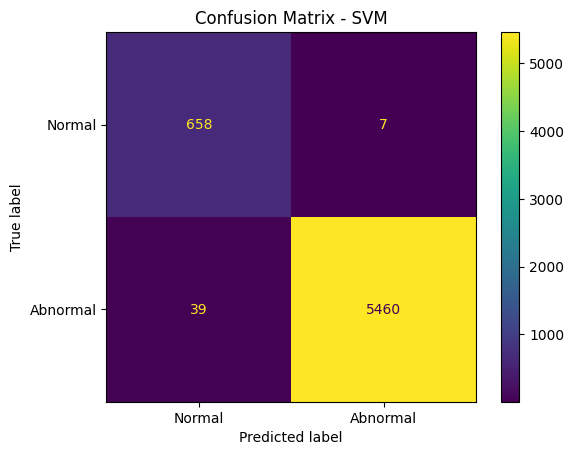


=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

      Normal       0.94      0.99      0.97       665
    Abnormal       1.00      0.99      1.00      5499

    accuracy                           0.99      6164
   macro avg       0.97      0.99      0.98      6164
weighted avg       0.99      0.99      0.99      6164

Accuracy: 0.9925373134328358


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    ConfusionMatrixDisplay
)

# 1. CONFUSION MATRIX
cm = confusion_matrix(y_test_encoded, y_pred)

print("=== CONFUSION MATRIX ===")
print(cm)

# Visualisasi confusion matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Normal', 'Abnormal']
)

plt.figure()
disp.plot()
plt.title("Confusion Matrix - SVM")
plt.show()

# 2. CLASSIFICATION REPORT
print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(
    y_test_encoded,
    y_pred,
    target_names=['Normal', 'Abnormal']
))

# 3. ACCURACY
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)


# **DEPLOYMENT**

Tahap Deployment bertujuan untuk mengimplementasikan model machine learning yang telah dibangun dan dievaluasi ke dalam aplikasi yang dapat digunakan oleh pengguna.
Pada proyek ini, deployment dilakukan dengan membangun aplikasi web berbasis Streamlit yang memungkinkan pengguna mengunggah data wafer dan memperoleh hasil prediksi kondisi wafer secara otomatis.

download model svm, scaler dan label_encoder untuk proses deployment streamlit

In [5]:
import joblib

joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']

Hasil deployment di streamlit

link deploy : https://uaspsd-timeseries.streamlit.app/